In [61]:
conda -update all


Note: you may need to restart the kernel to use updated packages.



CommandNotFoundError: No command 'conda all'.
Did you mean 'conda install'?



In [44]:
import pandas as pd
import numpy as np
from scipy.stats import norm, kde
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use("seaborn")

C:\Users\ianli\AppData\Local\Temp\ipykernel_9584\3010589991.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn")


In [17]:
# Lee archivo
#url = "https://raw.githubusercontent.com/FoxuF/DataSetsMachineLearning/main/DataSets/SaratogaHouses.csv"
#df = pd.read_csv(url, header=None, sep=",")
df = pd.read_csv("https://raw.githubusercontent.com/FoxuF/DataSetsMachineLearning/main/DataSets/SaratogaHouses.csv", encoding= 'unicode_escape')

In [ ]:
# Cambia columnas
df.columns = ["price","lotSize","age","landValue","livingArea","pctCollege","bedrooms",
              "fireplaces","bathrooms","rooms","heating","fuel","sewer","waterfront",
              "newConstruction","centralAir"]

In [18]:

df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [32]:
df.shape

(1728, 16)

In [34]:
df.isnull().sum()

price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64

In [33]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [19]:
df.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [35]:
df.tail()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6,hot air,gas,septic,No,No,No


In [ ]:
# Función que remueve espacios en columnas de cadenas de caracteres
def leading_space_remover(dataframe):
    for i in dataframe.columns:         
        if dataframe[i].dtype == "object":
            dataframe[i] = dataframe[i].map(str.strip)

In [ ]:
# Remueve espacios en columnas de cadenas de caracteres
leading_space_remover(df)

In [20]:
# Imprime valores únicos en columna 
df.heating.unique()


array(['electric', 'hot water/steam', 'hot air'], dtype=object)

In [21]:
df.fuel.unique()

array(['electric', 'gas', 'oil'], dtype=object)

In [59]:
df.sewer.unique()

array(['septic', 'public/commercial', 'none'], dtype=object)

In [22]:
# Devuelve distribución de Edades por LivingArea 
df.groupby("livingArea").size()/len(df)*100
     

livingArea
616     0.057870
640     0.057870
668     0.057870
672     0.173611
704     0.057870
          ...   
4211    0.057870
4486    0.057870
4534    0.057870
4856    0.057870
5228    0.057870
Length: 877, dtype: float64

In [47]:
# Selecciona casas electricas
df_electric = df[df.fuel == "electric"]

# Selecciona casas electricas con un precio mayor a los 50K
df_electric_50k = df_electric[df_electric.price >= 50000]

# Guarda porcentaje de las casas electricas con precio mayor a los 50K
pct_electric_50k = round(len(df_electric_50k)/len(df_electric)*100)

print("{0}% de las casas electricas tiene un precio mayor a los 50K.".format(pct_electric_50k))

99% de las casas electricas tiene un precio mayor a los 50K.


In [46]:
# Guarda edad media de casas
mu_age = round(df.age.mean())
print("Edad media de casa: ", mu_age)
# Guarda edad media de casas electricas
mu_age_el = round(df_electric.age.mean())

# Guarda edad media de casas electricas con valores mayores a 50k
mu_age_el_50k = round(df_electric_50k.age.mean())

print("La edad media de las casas electricas es de {0}, mientras que las casas electricas con un precio mayor a los 50K es de {1}.".format(mu_age_el, mu_age_el_50k))
     


Edad media de casa:  28
La edad media de las casas electricas es de 21, mientras que las casas electricas con un precio mayor a los 50K es de 21.


In [29]:
# Selecciona casas gas
df_gas = df[df.fuel == "gas"]

# Guarda edad media de los dueños de casas de gas
mu_age_gas = round(df_gas.age.mean())
print("Edad media de los dueños de casa que usan gas es: ", mu_age_gas)

Edad media de los dueños de casa que usan gas es:  26


In [37]:
 df["sewer"].value_counts()
     

public/commercial    1213
septic                503
none                   12
Name: sewer, dtype: int64

In [38]:
df["rooms"].value_counts()

7     305
8     258
6     247
5     223
4     181
9     142
10    141
3      80
12     77
11     72
2       2
Name: rooms, dtype: int64

In [40]:
df["livingArea"].value_counts()

1480    49
912     40
2310    16
960     15
1184    14
        ..
1172     1
4128     1
2628     1
1258     1
1959     1
Name: livingArea, Length: 877, dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'lotSize'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'landValue'}>,
        <Axes: title={'center': 'livingArea'}>,
        <Axes: title={'center': 'pctCollege'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'fireplaces'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'rooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

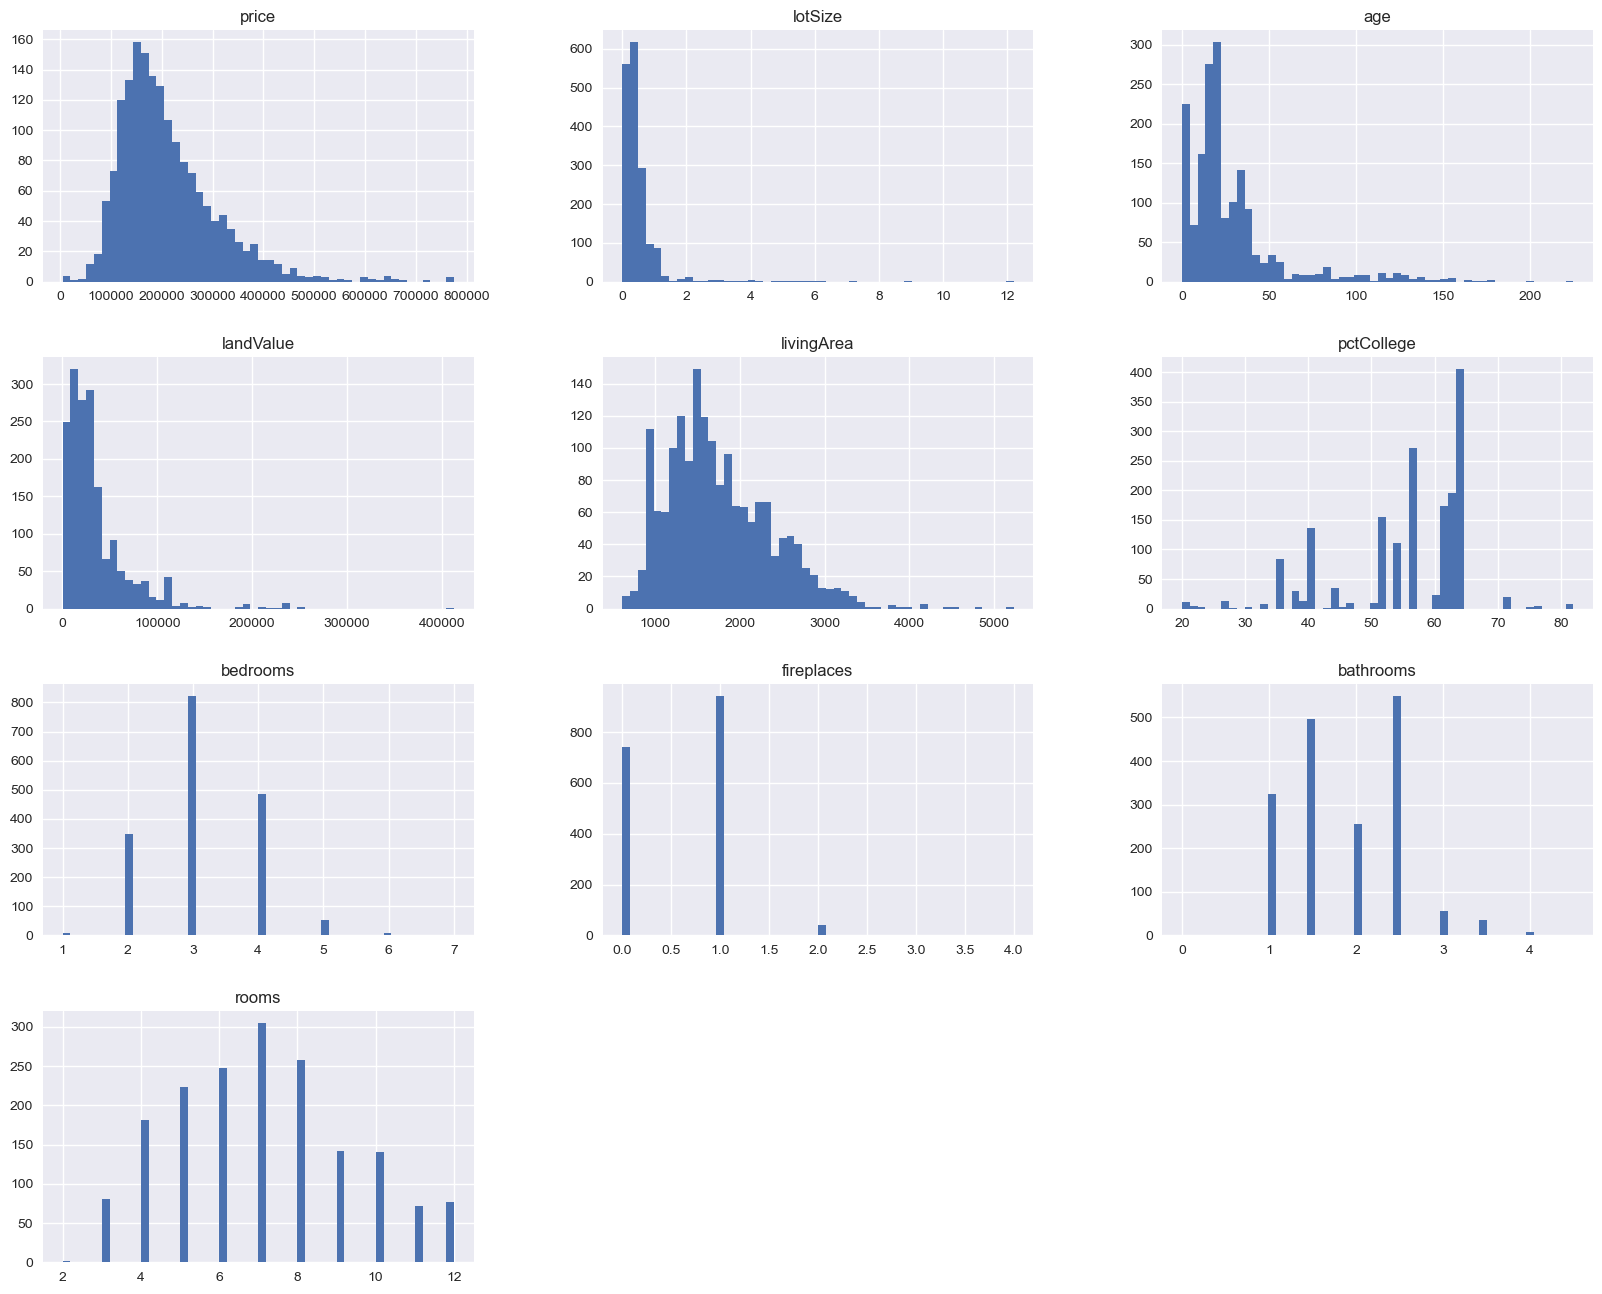

In [41]:
# Grafica histograma para cada variable continua
df.hist(bins=50, figsize=(20,16))

In [36]:
df.corr()

C:\Users\ianli\AppData\Local\Temp\ipykernel_9584\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
price,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
lotSize,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.085226,0.084823,0.137604
age,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
landValue,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
livingArea,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
pctCollege,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
bedrooms,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
fireplaces,0.376786,0.085226,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
bathrooms,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
rooms,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


In [42]:
# Calcula matriz de correlación
corr_matrix = df.corr()

C:\Users\ianli\AppData\Local\Temp\ipykernel_9584\3881588311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

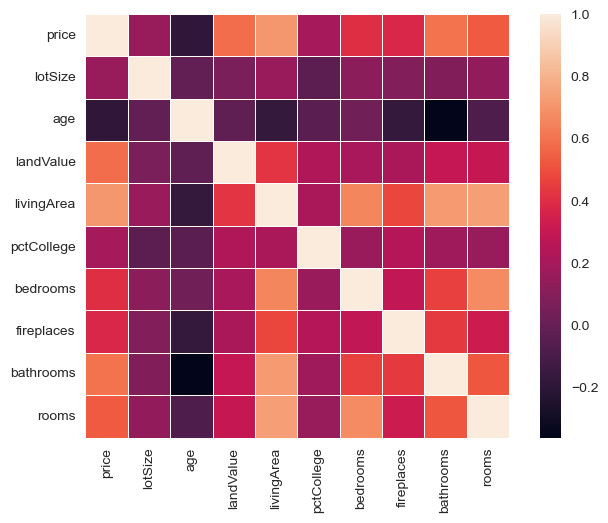

In [45]:
# Grafica matriz de correlación en mapa de calor
sns.heatmap(corr_matrix, square=True, linewidths=0.5)

In [48]:
# Devuelve correlaciones con el price
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
livingArea    0.712390
bathrooms     0.597250
landValue     0.581266
rooms         0.531170
bedrooms      0.400349
fireplaces    0.376786
pctCollege    0.200119
lotSize       0.158333
age          -0.188793
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='livingArea', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='age', ylabel='price'>,
        <Axes: xlabel='rooms', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='livingArea'>,
        <Axes: xlabel='livingArea', ylabel='livingArea'>,
        <Axes: xlabel='bathrooms', ylabel='livingArea'>,
        <Axes: xlabel='age', ylabel='livingArea'>,
        <Axes: xlabel='rooms', ylabel='livingArea'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='livingArea', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bathrooms'>,
        <Axes: xlabel='age', ylabel='bathrooms'>,
        <Axes: xlabel='rooms', ylabel='bathrooms'>],
       [<Axes: xlabel='price', ylabel='age'>,
        <Axes: xlabel='livingArea', ylabel='age'>,
        <Axes: xlabel='bathrooms', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabe

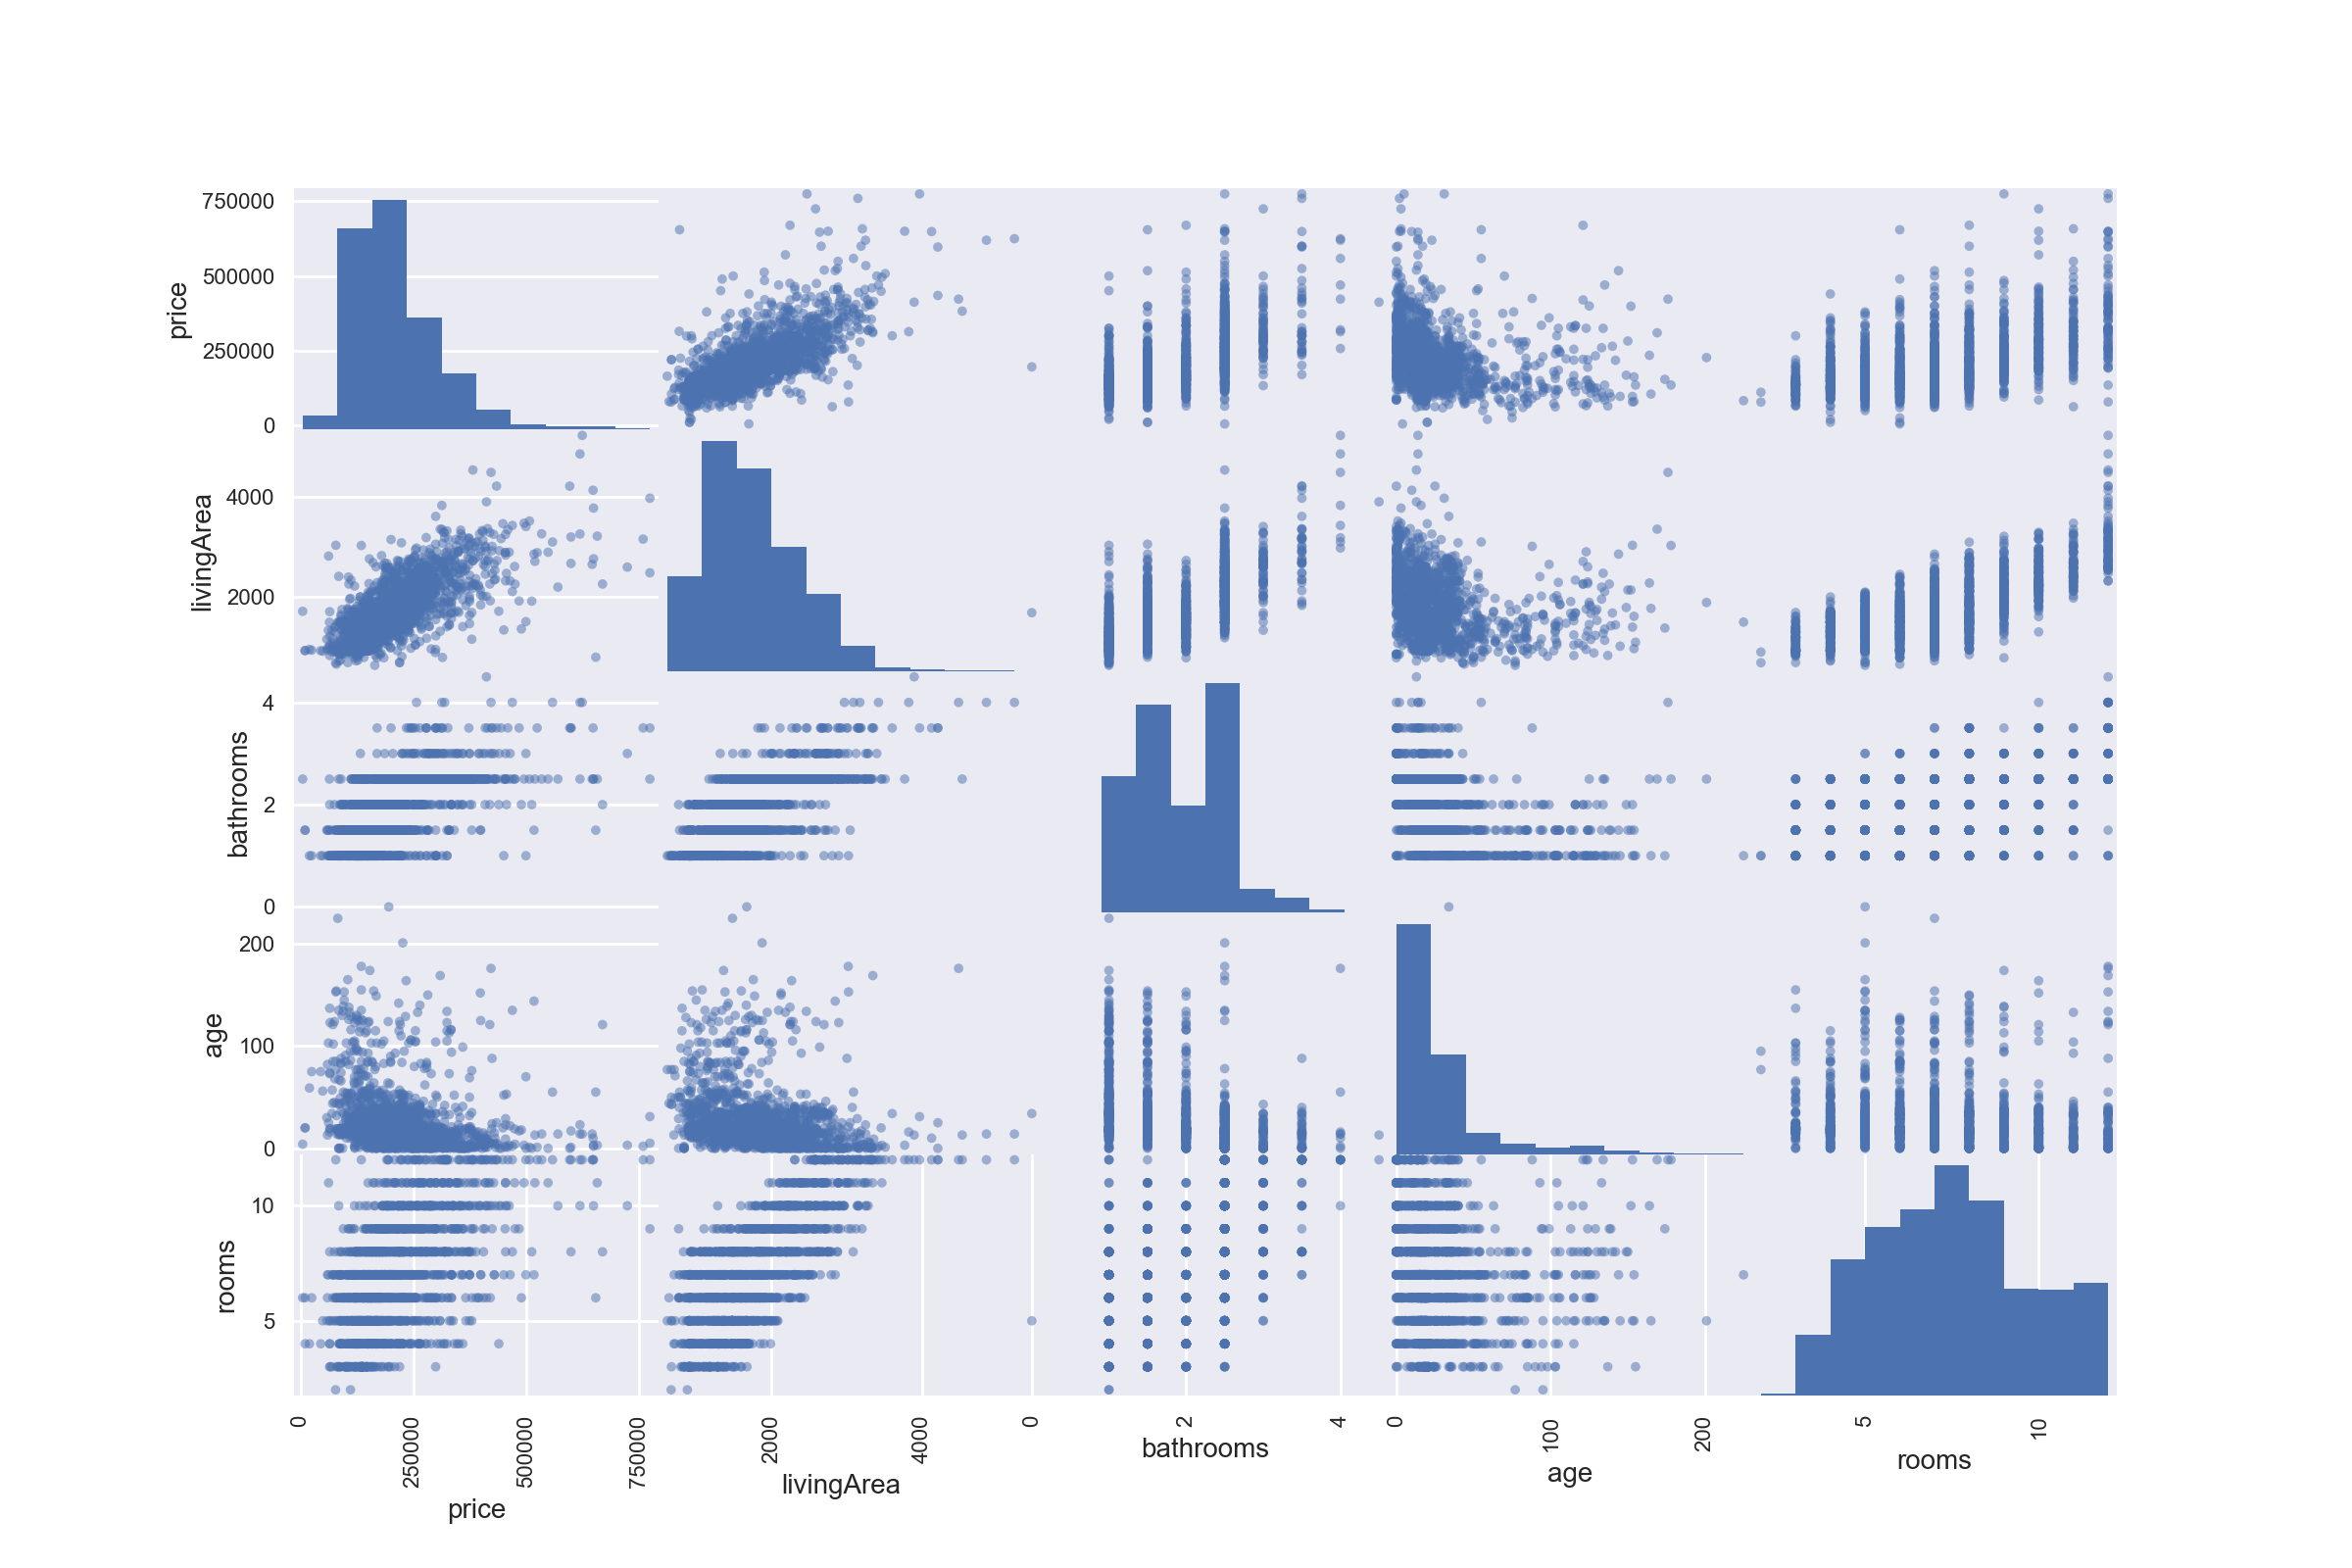

In [60]:
# Grafica matriz de dispersión 
vars = ["price", "livingArea", "bathrooms", "age", "rooms"]
pd.plotting.scatter_matrix(df[vars], figsize=(12, 8))

In [57]:
from plotnine import ggplot, aes, geom_histogram, facet_grid, facet_wrap, geom_bar, geom_point

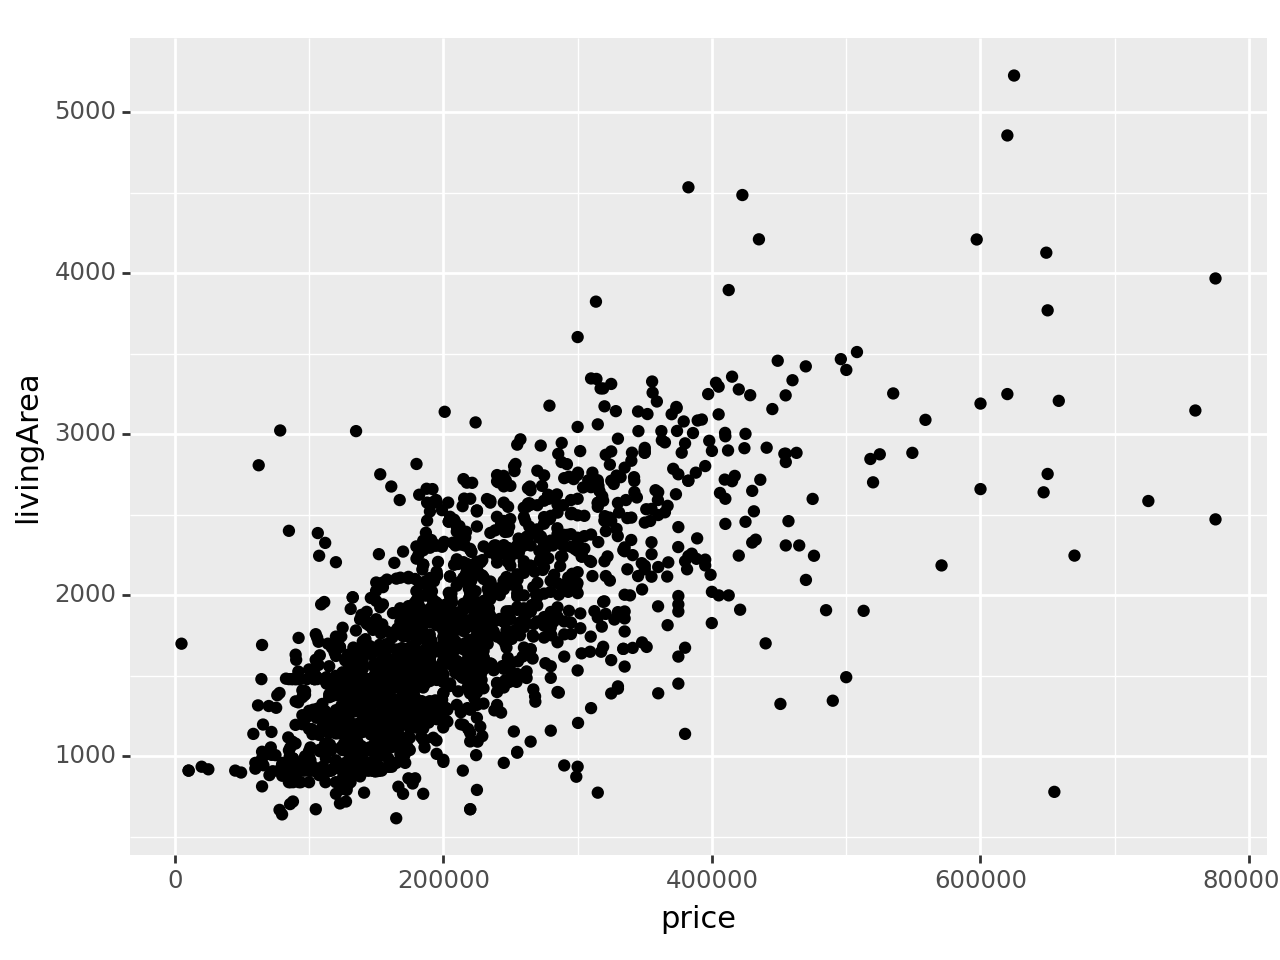

<Figure Size: (640 x 480)>

In [58]:
# Gráfico de barras que muestra el valor de la vivienda y el area
ggplot(df) + aes(x="price", y="livingArea") + geom_point()

Edad no es edad del dueño si no de la casa
Rooms parece incluir a los baños en su conteo
El precio aumenta mas por el area que por ejemplo las habitaciones
y tiende a disminuir con la edad de la vivienda
El grafico de la matriz de dispersion nos muestra que  la variable más prometedora para predecir el valor de la vivienda es el livingArea.
En conclusion si quiero predecir un valor, utilizaria de variables independientes a el area de vivienda o los cuartos ya que Aparentemente, las casas con una relación dormitorio/habitación más baja tienden a ser más caras. El número de habitaciones por hogar también es más informativo que el número total de habitaciones en un distrito; obviamente, cuanto más grandes son las casas, más caras son.